# Data Science Immersive: SQL Fu
## Starter code for guided practice & demos

In [39]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [1]:
# Imports
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sb
%matplotlib inline

# Config
DATA_DIR = Path('.')
np.random.seed(1)

## Rossmann Drugstore Sales Data
We will be using data made available by a German drugstore, Rossmann. This data contains the daily sales made at the drugstore as well as whether there was a sale or holiday affecting the sales data.

[Kaggle Rossmann Store Sales](https://www.kaggle.com/c/rossmann-store-sales)

>Rossmann operates over 3,000 drug stores in 7 European countries. Currently, 
Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### Data Dictionary

| Column | Description |
| -- | -- |
| **`Id`** | an Id that represents a (Store, Date) duple within the test set |
| **`Store`** | a unique Id for each store |
| **`Sales`** | the turnover for any given day (this is what you are predicting) |
| **`Customers`** | the number of customers on a given day |
| **`Open`** | an indicator for whether the store was open: 0 = closed, 1 = open |
| **`StateHoliday`** | indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None |
| **`SchoolHoliday`** | indicates if the (Store, Date) was affected by the closure of public schools |
| **`Promo`** | indicates whether a store is running a promo on that day. |

In [2]:
data = pd.read_csv(DATA_DIR / 'rossmann.csv', low_memory=False)
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## Recap: Accessing databases from pandas
Let's recap how to create a local SQLite database.

In [3]:
# We can create a SQLite database as follows:
from pandas.io import sql
import sqlite3

# Create test_sqlite_database.db file in current directory
conn = sqlite3.connect('test_sqlite_database.db')

In [4]:
# Load `data` object into `rossmann_sales` table in our sqlite db using pd.to_sql()
# N.B. we're replacing anything that's already there
data.to_sql('rossmann_sales', con=conn, if_exists='replace', index=False)

In [5]:
# Do a basic read query
sql.read_sql("SELECT * FROM rossmann_sales LIMIT 10", con=conn)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [6]:
# Calculate total customers per store
sql.read_sql("""
    SELECT Store, SUM(Customers)
    FROM rossmann_sales
    GROUP BY Store""", con=conn)

,Store,SUM(Customers)
0,1,440523
1,2,457855
2,3,584310
3,4,1036254
4,5,418588
5,6,495483
6,7,745569
7,8,516027
8,9,451677
9,10,465661


> #### CHECK: Load the Rossmann Store metadata in `rossmann-stores.csv` and create a table into the database from it called `rossmann_stores`

In [10]:
# ...
# Load `data` object into `rossmann_sales` table in our sqlite db using pd.to_sql()
# N.B. we're replacing anything that's already there
data2 = pd.read_csv(DATA_DIR / 'rossmann-stores.csv', low_memory=False)
data2.to_sql('rossmann_stores', con=conn, if_exists='replace', index=False)
sql.read_sql("""
    SELECT *
    FROM rossmann_stores
    GROUP BY Store""", con=conn)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,None
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,None
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,None
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,None
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,None
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,None
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,None


## Recap: SQL Syntax

### SELECT
Every query should start with SELECT. SELECT is followed by the names of the columns in the output.

SELECT is always paired with FROM, and FROM identifies the table to retrieve data from.

    SELECT <columns>
    FROM <table>

SELECT * denotes returns all of the columns.

In [11]:
# Rossmann Stores example
sql.read_sql("""
SELECT Store, Sales
FROM rossmann_sales;
""", con=conn).head()

,Store,Sales
0,1,5263
1,2,6064
2,3,8314
3,4,13995
4,5,4822


> #### CHECK: Write a query that returns the `Store`, `Date` and `Customers`.

In [12]:
# ...

sql.read_sql("""
SELECT Store, Date, Customers
FROM rossmann_sales;
""", con=conn).head()

,Store,Date,Customers
0,1,2015-07-31,555
1,2,2015-07-31,625
2,3,2015-07-31,821
3,4,2015-07-31,1498
4,5,2015-07-31,559


### WHERE
WHERE is used to filter table to a specific criteria and follows the FROM clause.

    SELECT <columns>
    FROM <table>
    WHERE <condition>

The condition is some filter applied to the rows, where rows that match the condition will be in the output.

In [13]:
# Rossmann Stores example
sql.read_sql("""
SELECT Store, Sales
FROM rossmann_sales
WHERE Store = 1;
""", con=conn).head()

,Store,Sales
0,1,5263
1,1,5020
2,1,4782
3,1,5011
4,1,6102


In [14]:
# Store & Sales for Store 1 when open
sql.read_sql("""
SELECT Store, Sales
FROM rossmann_sales
WHERE Store = 1
  AND Open = 1;
""", con=conn).head()

,Store,Sales
0,1,5263
1,1,5020
2,1,4782
3,1,5011
4,1,6102


> #### CHECK: Write a query that returns the `Store`, `Date` and `Customers` for when the stores were open and running a promotion.

In [16]:
# ...
sql.read_sql("""
SELECT Store, Date, Customers
FROM rossmann_sales
WHERE Open = 1
    AND Promo = 1;
""", con=conn).head()

,Store,Date,Customers
0,1,2015-07-31,555
1,2,2015-07-31,625
2,3,2015-07-31,821
3,4,2015-07-31,1498
4,5,2015-07-31,559


### GROUP BY
`GROUP BY` allows us to aggregate over any field in the table. We identify some key with which want to segment the rows. Then, we roll-up or compute some statistic over all of the rows that match that key.

`GROUP BY` must be paired with an aggregate function - the statistic we want to compute in the rows - in the `SELECT` statement.

`COUNT(*)` denotes counting up all of the rows. Other aggregate functions commonly available are `AVG` (average), `MAX`, `MIN`, and `SUM`.

If we want an aggregate over the entire table - without results specific to any key, we can use an aggregate function in the `SELECT` statement and ignore the `GROUP BY` clause.

In [17]:
# Rossmann Stores example
sql.read_sql("""
SELECT Store, SUM(Sales), AVG(Customers)
FROM rossmann_sales
WHERE Open = 1
GROUP BY Store;
""", con=conn).head()

,Store,SUM(Sales),AVG(Customers)
0,1,3716854,564.049936
1,2,3883858,583.998724
2,3,5408261,750.077022
3,4,7556507,1321.752551
4,5,3642818,537.340180


> #### CHECK: Write a query that returns the total sales on promotion days and non-promotion days.

In [23]:
# ...
# Rossmann Stores example
sql.read_sql("""
SELECT Promo, SUM(Sales)
FROM rossmann_sales
WHERE Open = 1
GROUP BY Promo;
""", con=conn).head()

,Promo,SUM(Sales)
0,0,2771974337
1,1,3101206286


### ORDER BY
Results of a query can be sorted by ORDER BY.

If we want to order the states by the number of polls, we would add an ORDER BY clause at the end.

The line

    SUM(Sales) as total_sales

renames the `SUM(Sales)` column as `total_sales` so we can refer to it later in the `ORDER BY` clause.

`DESC` tells the result to be in descending order as opposed to increasing.

In [26]:
# Rossmann Stores example
sql.read_sql("""
SELECT
  Store,
  SUM(Sales) as total_sales,
  AVG(Customers)
FROM rossmann_sales
WHERE Open = 1
GROUP BY Store
ORDER BY total_sales DESC;
""", con=conn).head()

,Store,total_sales,AVG(Customers)
0,262,19516842,3402.010616
1,817,17057867,3130.573980
2,562,16927322,3105.053079
3,1114,16202585,3200.946429
4,251,14896870,2450.492940


> #### CHECK: Combine `ORDER BY` with `LIMIT 1` to find the store and date which has the most sales.

In [32]:
# ...
# Rossmann Stores example
sql.read_sql("""
SELECT
  Store,
  Date,
  Sales
FROM rossmann_sales
ORDER BY Sales DESC
LIMIT 1;
""", con=conn).head()

,Store,Date,Sales
0,909,2015-06-22,41551


> #### CHECK: Conversely, find the store and date with the fewest non-zero sales.

In [37]:
# ...
# ...
# Rossmann Stores example
sql.read_sql("""
SELECT
  Store,
  Date,
  Sales
FROM rossmann_sales
WHERE Open = 1 AND
    Sales > 0
ORDER BY Sales ASC
LIMIT 1;
""", con=conn).head()

,Store,Date,Sales
0,652,2014-11-22,46


### JOIN
`JOIN` allows us to access data across many tables. We will need to specify how a row in one table links to a row in another.

Here `ON` denotes an Inner Join.

#### Inner Join
By default, most joins are an Inner Join, which means only when there is a match in both tables, does a row appear in the result.

#### Outer Join
If we want to keep the rows of one table even if there is no matching counterpart we can perform an Outer Join. Outer joins can be LEFT, RIGHT, or FULL meaning keep all the left rows, all the right rows or all the rows, respectively.

In [40]:
# Rossmann Stores example
sql.read_sql("""
SELECT
    sales.Store,
    sales.Sales,
    stores.CompetitionDistance
FROM rossmann_sales AS sales
INNER JOIN rossmann_stores AS stores ON sales.Store = stores.Store
""", con=conn).head()

,Store,Sales,CompetitionDistance
0,1,5263,1270.0
1,2,6064,570.0
2,3,8314,14130.0
3,4,13995,620.0
4,5,4822,29910.0


> #### CHECK: Combine `GROUP BY` and `JOIN` to find the average sales by `StoreType`
> - Bonus: use `AS` to clean up the column names in the result

In [42]:
# ...
# Rossmann Stores example
sql.read_sql("""
SELECT
    stores.StoreType,
    AVG(sales.Sales)
FROM rossmann_sales AS sales
INNER JOIN rossmann_stores AS stores ON sales.Store = stores.Store
GROUP BY StoreType
""", con=conn).head()

,StoreType,AVG(sales.Sales)
0,a,5738.179710
1,b,10058.837334
2,c,5723.629246
3,d,5641.819243


> #### CHECK: How does this last query change if you exclude days when stores are not `Open`?

In [57]:
# ...
sql.read_sql("""
SELECT
    stores.StoreType,
    AVG(sales.Sales)
FROM rossmann_sales AS sales
INNER JOIN rossmann_stores AS stores ON sales.Store = stores.Store
    AND sales.Open = 1
GROUP BY StoreType
""", con=conn).head()

,StoreType,AVG(sales.Sales)
0,a,6925.167661
1,b,10231.407505
2,c,6932.512755
3,d,6822.141881


### HAVING
`HAVING` allows you to apply a filter _after_ you've applied an aggregation with `GROUP BY`.

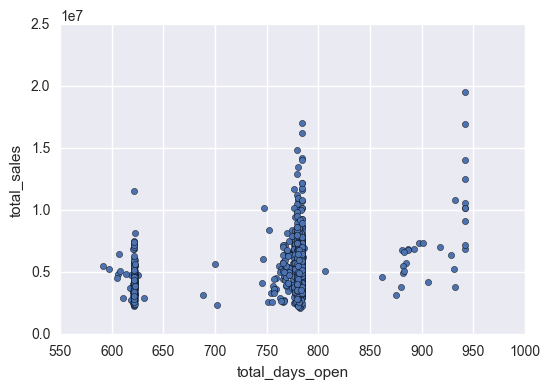

In [43]:
# HAVING example: let's find the top store in the bottom sales bracket

# First, let's look at how the total days a store is open relates to total sales from that store
sql.read_sql("""
SELECT
    Store,
    SUM(Open) AS total_days_open,
    SUM(Sales) AS total_sales
FROM rossmann_sales
GROUP BY Store
""", con=conn).plot(x='total_days_open', y='total_sales', kind='scatter')

In [44]:
# There are three distinct brackets of stores, possibly the bottom bracket have 
# been opened most recently.
# Let's find the store with the most sales in that bracket (i.e. that has < 650 days open)
sql.read_sql("""
SELECT
    Store,
    SUM(Open) AS total_days_open,
    SUM(Sales) AS total_sales
FROM rossmann_sales
GROUP BY Store
HAVING total_days_open < 650
ORDER BY total_sales DESC
LIMIT 2
""", con=conn)

,Store,total_days_open,total_sales
0,842,622,11553523
1,1027,623,8163847


> #### CHECK: There are two distinct store types in terms of the number of Promo days. From the stores in the upper band (for total Promo days), identify the store with the least sales.

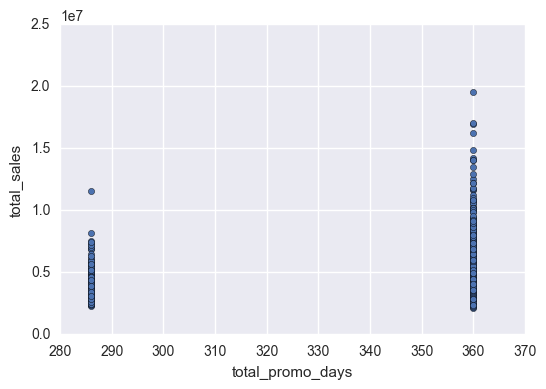

In [45]:
sql.read_sql("""
SELECT
    Store,
    SUM(Promo) AS total_promo_days,
    SUM(Sales) AS total_sales
FROM rossmann_sales
GROUP BY Store
""", con=conn).plot(x='total_promo_days', y='total_sales', kind='scatter')

In [48]:
# ...
sql.read_sql("""
SELECT
    Store,
    SUM(Promo) AS total_promo_days,
    SUM(Sales) AS total_sales
FROM rossmann_sales
GROUP BY Store
HAVING total_promo_days > 290
ORDER BY total_sales ASC
LIMIT 2
""", con=conn)

,Store,total_promo_days,total_sales
0,307,360,2114322
1,543,360,2179287


### CONCAT
`CONCAT` allows you to join multiple columns into one new column. In:
- SQLite and PostgreSQL, we use `column_1 || column_2`
- MySQL, we use `CONCAT(column_1, column_2)`

In [49]:
# CONCAT example: this could be useful if you need to construct a unique identifier to 
# join between two tables that both have stores and dates.
sql.read_sql("""
SELECT
    Store || "_" || Date AS store_date,
    SUM(Sales) AS total_sales
FROM rossmann_sales
GROUP BY store_date
ORDER BY total_sales DESC
""", con=conn).head()

,store_date,total_sales
0,909_2015-06-22,41551
1,262_2015-04-03,38722
2,262_2015-05-01,38484
3,262_2015-05-14,38367
4,57_2014-06-16,38037


### Subquerying
Subqueries allow you to create sub-tables of results to use in your overall SQL query.

In [50]:
# Subquery example: let's say we want to find the value of each store's second highest sales.
# Let's build this up before we do the subquery...
sql.read_sql("""
SELECT
    Store,
    Date,
    MAX(Sales) AS max_sales
FROM rossmann_sales
GROUP BY Store
""", con=conn).head()

,Store,Date,max_sales
0,1,2013-12-23,9528
1,2,2014-06-30,10682
2,3,2014-06-30,15689
3,4,2013-12-30,17412
4,5,2013-12-16,11692


In [51]:
# What if SQL doesn't return the correct associated date for the maximum sales 
# (not necessarily a given)
# We could do this if we needed to:
#   - subquery gives value of max sales for each store
#   - the INNER JOIN here acts as a filter, returning only the columns associated with 
# the date where sales is max
sql.read_sql("""
SELECT
    sales.Store,
    sales.Date,
    sales.Sales AS max_sales
FROM rossmann_sales AS sales
INNER JOIN (
    -- Max sales per store
    SELECT
        Store,
        MAX(Sales) AS max_sales
    FROM rossmann_sales
    GROUP BY Store
    ) AS subquery ON sales.Store = subquery.Store
                 AND sales.Sales = subquery.max_sales
ORDER BY sales.Store
""", con=conn).head()

,Store,Date,max_sales
0,1,2013-12-23,9528
1,2,2014-06-30,10682
2,3,2014-06-30,15689
3,4,2013-12-30,17412
4,5,2013-12-16,11692


In [52]:
# We want each store's SECOND highest sales day though
sql.read_sql("""
SELECT
    sales.Store,
    sales.Date,
    MAX(sales.Sales) AS second_highest_sales
FROM rossmann_sales AS sales
INNER JOIN (
    -- Filter OUT max sales per store
    SELECT
        Store,
        Date,
        MAX(Sales) AS max_sales
    FROM rossmann_sales
    GROUP BY Store
    ) AS subquery ON sales.Store = subquery.Store
                 AND sales.Sales != subquery.max_sales
GROUP BY sales.Store
""", con=conn).head()

,Store,Date,second_highest_sales
0,1,2014-12-22,9331
1,2,2013-12-16,10479
2,3,2013-12-16,14647
3,4,2015-04-02,17311
4,5,2013-12-23,10877


In [53]:
# The above works, but the below demonstrates two nice concepts: CONCAT and NOT IN
# Instead of using the subquery's JOIN to filter out maximum sales days, we'll use a second subquery
# to derive a list of unique store-date identifiers to filter out
sql.read_sql("""
SELECT
    sales.Store,
    sales.Date,
    MAX(sales.Sales) AS second_highest_sales
FROM rossmann_sales AS sales
WHERE sales.Store || sales.Date NOT IN (
    SELECT store_date
    FROM (
        -- Max sales per store
        SELECT
            Store,
            Store || Date AS store_date,
            MAX(Sales) AS max_sales
        FROM rossmann_sales S
        GROUP BY Store
        )
    )
GROUP BY sales.Store
""", con=conn).head()

,Store,Date,second_highest_sales
0,1,2014-12-22,9331
1,2,2013-12-16,10479
2,3,2013-12-16,14647
3,4,2015-04-02,17311
4,5,2013-12-23,10877


## Independent Practice: Pandas and SQL
#### Exercises
1. Load the Walmart sales data (`walmart.csv`) and features data (`walmart_features.csv`)
2. Create a table for each of those datasets
3. Select the store, date and fuel price on days it was over 90 degrees
4. Select the store, date and weekly sales and temperature
5. What were average sales on holiday vs. non-holiday sales
6. What were average sales on holiday vs. non-holiday sales when the temperature was below 32 degrees

#### Bonus: What is the average store sales across each store's second hottest day?

#### Walmart Recruiting - Store Sales Forecasting

Retrieved from [Kaggle](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data):

> You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

> In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

> #### 1. Load the Walmart sales data (`walmart.csv`) and features data (`walmart_features.csv`)

In [ ]:
# ...


> #### 2. Create a table for each of those datasets

In [ ]:
# ...


> #### 3. Select the store, date and fuel price on days it was over 90 degrees

In [ ]:
# ...


> #### 4. Select the store, date and weekly sales and temperature

In [ ]:
# ...


> #### 5. What were average sales on holiday vs. non-holiday sales

In [ ]:
# ...


> #### 6. What were average sales on holiday vs. non-holiday sales when the temperature was below 32 degrees

In [ ]:
# ...


> #### Bonus: What is the average store sales across each store's second hottest day?

In [ ]:
# ...
